In [2]:
import os
import glob
from collections import namedtuple

from astropy.io import ascii as asc
from astropy.time import Time
from astropy import table
import astropy.units as u
import astropy.constants as c

import numpy as np
from matplotlib import pyplot as plt
%matplotlib

import spectroscopy

Using matplotlib backend: Qt5Agg


In [3]:
FIG_DIR = '../figures'
DATA_DIR = '../data/line_info/'

### Wavelengths are already corrected for redshift!

In [4]:
sn = namedtuple('sn', ('jdexpl', 'redshift'))
jd_expl = Time(2457262., format='jd')
redshift = 0.006931 #Ref: NED object: HIPASS J1919-33
sn15oz = sn(jdexpl=jd_expl, redshift=redshift)

In [5]:
flist = [#'hbeta.tab', 'hbeta_2.tab', 'hbeta_3.tab', 
         #'NaI5898.tab', 'NaI5898_2.tab', 
         'ScII5239.tab', 'ScII5239_2.tab', 
         #'ScII5526.tab', 
         'ScII5526_2.tab', 'ScII5526_3.tab', 
         'ScII5662.tab', 'ScII5662_2.tab', 
         'ScII6262.tab', 'ScII6262_2.tab', 'ScII6262_3.tab']

tbdata = asc.read(os.path.join(DATA_DIR,flist[0]))
for ifile in flist[1:]:
    tbdata = table.vstack((tbdata, asc.read(os.path.join(DATA_DIR,ifile))))

In [6]:
for iline in tbdata:
    iline['line'] = iline['line'].split('_')[0]

In [7]:
rest_wavelengths = {'NaI': 5898,
                    'HA-cachito': 6561,
                    'HB': 4861,
                    #'hbeta': 4861, #Better fit with Gaussian than Silverman method
                    #'NaI5898':5893,  #Better fit with Gaussian than Silverman method 
                    'ScII5662':5662, 
                    'ScII6262': 6262,
                    'ScII5526': 5526,
                    #'ScII5239': 5239, #Better fit with Gaussian than Silverman method
                    'FeII_multi': 5169, 
                    'OI': 7774,
                    'CaII': 8498.
                   }
colors = {'HA-cachito': 'lime',
          'HB': 'g', 
          'hbeta': 'c',
          'NaI5898':'navy', 
          'NaI': 'b',
          'ScII5662':'yellow', 
          'ScII6262': 'orange',
          'ScII5526': 'gold',
          'ScII5239': 'r',
          'FeII_multi':'purple', 
         'OI': 'r', 
         'CaII': 'm'}
markers = {'HA-cachito': 'o',
           'HB': '.',
          'hbeta': '.',
           'NaI': 's',
          'NaI5898':'s', 
          'ScII5662':'^', 
          'ScII6262': '>',
          'ScII5526': '<',
          'ScII5239': 'v',
          'FeII_multi':'d', 
          'OI': 'p',
          'CaII': '*'}

In [10]:
tbdata_halpha = asc.read(os.path.join(DATA_DIR, 'HA.tab'))
#tbdata_halpha.remove_columns(['vel0', 'vel_err_left_0', 'vel_err_right_0', 'vel_pew_0', 'vel_pew_err0'])
tbdata_halpha.rename_column('vel0', 'velocity')
tbdata_halpha.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_halpha.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_halpha.rename_column('vel_pew_0', 'pew')
tbdata_halpha.rename_column('vel_pew_err0', 'pew_err')

In [11]:
tbdata_feII = asc.read(os.path.join(DATA_DIR, 'FeII_multi.tab'))
tbdata_feII.remove_columns(['vel1', 'vel_err_left_1', 'vel_err_right_1', 'vel_pew_1', 'vel_pew_err1'])
tbdata_feII.rename_column('vel0', 'velocity')
tbdata_feII.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_feII.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_feII.rename_column('vel_pew_0', 'pew')
tbdata_feII.rename_column('vel_pew_err0', 'pew_err')

In [12]:
tbdata_HB = asc.read(os.path.join(DATA_DIR, 'HB.tab'))
tbdata_HB.rename_column('vel0', 'velocity')
tbdata_HB.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_HB.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_HB.rename_column('vel_pew_0', 'pew')
tbdata_HB.rename_column('vel_pew_err0', 'pew_err')

In [13]:
tbdata_NaI = asc.read(os.path.join(DATA_DIR, 'NaI.tab'))
tbdata_NaI.rename_column('vel0', 'velocity')
tbdata_NaI.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_NaI.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_NaI.rename_column('vel_pew_0', 'pew')
tbdata_NaI.rename_column('vel_pew_err0', 'pew_err')

In [14]:
tbdata_OI = asc.read(os.path.join(DATA_DIR, 'OI.tab'))
tbdata_OI.rename_column('vel0', 'velocity')
tbdata_OI.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_OI.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_OI.rename_column('vel_pew_0', 'pew')
tbdata_OI.rename_column('vel_pew_err0', 'pew_err')

In [15]:
tbdata_CaII = asc.read(os.path.join(DATA_DIR, 'CaII.tab'))
tbdata_CaII.remove_columns(['vel1', 'vel_err_left_1', 'vel_err_right_1', 'vel_pew_1', 'vel_pew_err1',
                           'vel2', 'vel_err_left_2', 'vel_err_right_2', 'vel_pew_2', 'vel_pew_err2'])
tbdata_CaII.rename_column('vel0', 'velocity')
tbdata_CaII.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_CaII.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_CaII.rename_column('vel_pew_0', 'pew')
tbdata_CaII.rename_column('vel_pew_err0', 'pew_err')

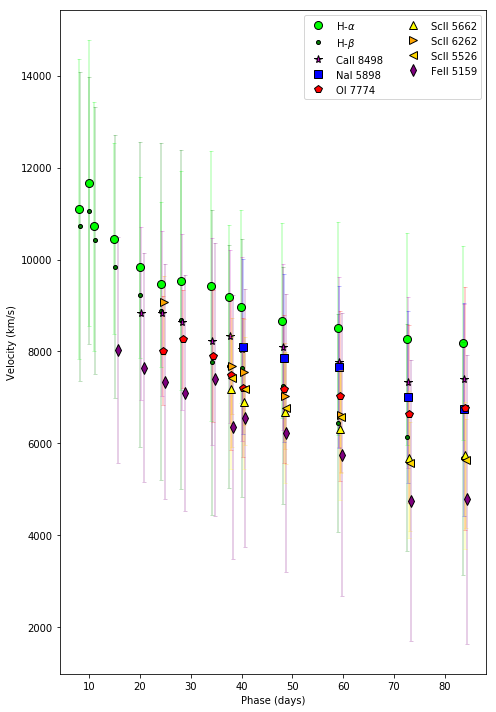

In [16]:
plt.ion()
plt.figure(figsize=[7,10])
plot_list = ['HA-cachito','HB','CaII','NaI','OI','ScII5662','ScII6262','ScII5526','FeII_multi']
for i, feature in enumerate(plot_list):
    if feature == 'HA-cachito':
        feature_tbdata = tbdata_halpha
        label = r'H-$\alpha$'
    elif feature == 'FeII_multi':
        feature_tbdata = tbdata_feII
        label = 'FeII 5159'
    elif feature =='HB':
        feature_tbdata = tbdata_HB
        label = r'H-$\beta$'
    elif feature == 'NaI':
        feature_tbdata = tbdata_NaI
        label = 'NaI 5898'
    elif feature == 'OI':
        feature_tbdata = tbdata_OI
        label = 'OI 7774'
    elif feature == 'CaII':
        feature_tbdata = tbdata_CaII
        label = 'CaII 8498'
    else:
        feature_tbdata = tbdata[tbdata['line']==feature]
        label = '{} {}'.format(feature[:-4], feature[-4:])
    if len(feature_tbdata) != 0:
        dates = Time(feature_tbdata['date'])
    else:
        print(feature)
    v = (((feature_tbdata['velocity'] - rest_wavelengths[feature])/rest_wavelengths[feature])*c.c.to(u.km/u.s))
    #plt.plot((dates-sn15oz.jdexpl).value+i*0.1, np.abs(v.value), '.', color=colors[feature], label=feature)
    v_err_l = np.sqrt(((c.c.to(u.km/u.s)/rest_wavelengths[feature])*feature_tbdata['vel_err_left'])**2)
    v_err_r = np.sqrt(((c.c.to(u.km/u.s)/rest_wavelengths[feature])*feature_tbdata['vel_err_right'])**2)
    plt.errorbar((dates-sn15oz.jdexpl).value+i*0.1, np.abs(v.value), yerr=(v_err_l.value, v_err_r.value), 
                 fmt=colors[feature], linestyle='none', capsize=2, alpha=0.25)
    plt.plot((dates-sn15oz.jdexpl).value+i*0.1, np.abs(v.value), 
                 color=colors[feature], linestyle='none', marker=markers[feature], label=label,
                 markeredgecolor='k', markersize = 8)
    
    

plt.legend(loc='best', ncol=2)
plt.xlabel('Phase (days)')
plt.ylabel('Velocity (km/s)')
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR,'line_velocity.pdf'))

# Compare to Faran 2014

In [19]:
tbdata_halpha = asc.read(os.path.join(DATA_DIR, 'HA.tab'))
#tbdata_halpha.remove_columns(['vel0', 'vel_err_left_0', 'vel_err_right_0', 'vel_pew_0', 'vel_pew_err0'])
tbdata_halpha.rename_column('vel0', 'velocity')
tbdata_halpha.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_halpha.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_halpha.rename_column('vel_pew_0', 'pew')
tbdata_halpha.rename_column('vel_pew_err0', 'pew_err')

In [20]:
tbdata_HB = asc.read(os.path.join(DATA_DIR, 'HB.tab'))
tbdata_HB.rename_column('vel0', 'velocity')
tbdata_HB.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_HB.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_HB.rename_column('vel_pew_0', 'pew')
tbdata_HB.rename_column('vel_pew_err0', 'pew_err')

In [21]:
tbdata_feII = asc.read(os.path.join(DATA_DIR, 'FeII_multi.tab'))
tbdata_feII.remove_columns(['vel1', 'vel_err_left_1', 'vel_err_right_1', 'vel_pew_1', 'vel_pew_err1'])
tbdata_feII.rename_column('vel0', 'velocity')
tbdata_feII.rename_column('vel_err_left_0', 'vel_err_left')
tbdata_feII.rename_column('vel_err_right_0', 'vel_err_right')
tbdata_feII.rename_column('vel_pew_0', 'pew')
tbdata_feII.rename_column('vel_pew_err0', 'pew_err')

In [22]:

v_feII = (((tbdata_feII['velocity'] - rest_wavelengths['FeII_multi'])/rest_wavelengths['FeII_multi'])*c.c.to(u.km/u.s))
v_feII_err_l = np.sqrt(((c.c.to(u.km/u.s)/rest_wavelengths['FeII_multi'])*tbdata_feII['vel_err_left'])**2)
v_feII_err_r = np.sqrt(((c.c.to(u.km/u.s)/rest_wavelengths['FeII_multi'])*tbdata_feII['vel_err_right'])**2)

v_hbeta = (((tbdata_HB['velocity'] - rest_wavelengths['HB'])/rest_wavelengths['HB'])*c.c.to(u.km/u.s))
v_hbeta_err_l = np.sqrt(((c.c.to(u.km/u.s)/rest_wavelengths['HB'])*tbdata_HB['vel_err_left'])**2)
v_hbeta_err_r = np.sqrt(((c.c.to(u.km/u.s)/rest_wavelengths['HB'])*tbdata_HB['vel_err_right'])**2)

v_feII_calc = 0.805*v_hbeta
v_feII_full = np.empty(len(tbdata_HB))
early_indx = Time(tbdata_HB['date']) < np.min(Time(tbdata_feII['date']))
late_indx = Time(tbdata_HB['date']) >= np.min(Time(tbdata_feII['date'])) 
v_feII_full[early_indx] = v_feII_calc[early_indx]
v_feII_full[late_indx] = v_feII
dates_full = Time(tbdata_HB['date'])
v50_phot = np.abs(np.interp(50, (dates_full-sn15oz.jdexpl).value, v_feII_full))

In [23]:
v_halpha = (((tbdata_halpha['velocity'] - rest_wavelengths['HA-cachito'])/rest_wavelengths['HA-cachito'])*c.c.to(u.km/u.s))
v_halpha_err_l = np.sqrt(((c.c.to(u.km/u.s)/rest_wavelengths['HA-cachito'])*tbdata_halpha['vel_err_left'])**2)
v_halpha_err_r = np.sqrt(((c.c.to(u.km/u.s)/rest_wavelengths['HA-cachito'])*tbdata_halpha['vel_err_right'])**2)

## Faran Relations

In [24]:
t = np.arange(5, 100, 0.1)
vfeII_theory = (t/50)**(-0.581)
vhalpha_theory = (t/50)**(-0.412)
vhbeta_theory = (t/50)**(-0.529)

vfeII_theory_up = (t/50)**(-0.581+0.034)
vhalpha_theory_up = (t/50)**(-0.412+0.020)
vhbeta_theory_up = (t/50)**(-0.529+0.027)

vfeII_theory_low = (t/50)**(-0.581-0.034)
vhalpha_theory_low = (t/50)**(-0.412-0.02)
vhbeta_theory_low = (t/50)**(-0.529-0.027)


## Guitierrez Empirical

In [25]:
t_gutierrez = np.array([4,8.6,12.8,18.1,23.1,27.7,33.1,38.1,42.8,47.8,53.1,58.6,63.3,68,72.8,78.2,83.5,87.5,93.3,98.2,103,108.2,115.7])
vhalpha_gutierrez = np.array([12845,10702 ,9468 ,8987 ,7798 ,8369 ,7745 ,7478 ,6551 ,7145 ,6535 ,6615 ,6619 ,6613 ,6720 ,6061 ,6490 ,6197 ,5666 ,5788 ,4422 ,5625 ,5805])
vhalpha_err_gutierrez = np.array([ 950 , 138,1787 ,1430 ,1966 ,1825 ,1194 ,1548 ,1745 ,1772 ,1755 ,1900 ,1565 ,1038 ,1564 ,1660 ,1883 ,1930 ,2016 ,2073 ,1353 ,1226 ,1176])

vhbeta_gutierrez = np.array([11379 ,9605 ,8748 ,8364 ,7083 ,7426 ,6668 ,6297 ,5267 ,5541 ,5004 ,5025 ,4836 ,4909 ,4725 ,4460 ,4386 ,4448 ,4261 ,4372 ,3014 ,4128 ,4536 ])
vhbeta_err_gutierrez = np.array([1800 ,1574 ,1653 ,1478 ,1690 ,1527 ,1260 ,1582 ,1600 ,1688 ,1785 ,1774 ,1548 ,1146 ,1665 ,1553 ,1492 ,1514 ,1493 ,1505 , 993 , 885 ,1025])

vfeII_gutierrez = np.array([10447,6871 ,6300 ,5274 ,5440 ,4942,4428 ,3760 ,3938,3537,3631,3401,3397,3374,3078,3074,3253,2946,2476,2119,2625,2451])
vfeII_err_gutierrez = np.array([ 1050 ,2234 ,1174 ,1254 ,1098 , 892 ,1065 ,1045 , 990 , 851 , 973 , 758 , 639 , 828 , 820 , 919 , 785 , 718 , 631 , 525 , 457 , 679])

v50_phot_gutierrez = np.interp(50, t_gutierrez[1:], vfeII_gutierrez)

(0, 2.5)

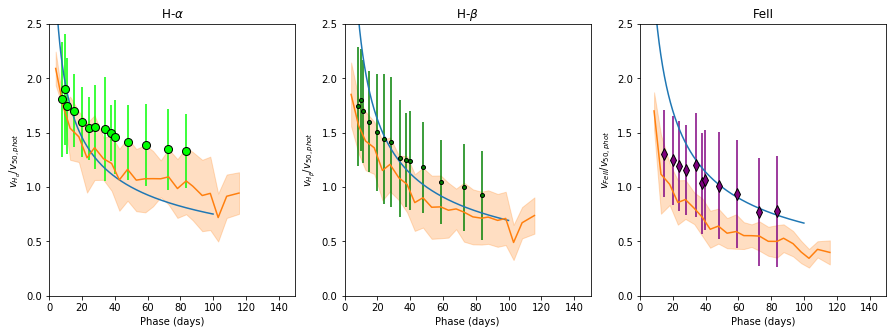

In [26]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=[15, 5])

dates_halpha = Time(tbdata_halpha['date'])
#ax1.plot((dates_halpha-sn15oz.jdexpl).value, np.abs(v_halpha.value/v50_phot), 
#                 color=colors['HA-cachito'], linestyle='none', marker=markers['HA-cachito'], label=r'H-$\alpha$',
#                 markeredgecolor='k', markersize = 8)

ax1.errorbar((dates_halpha-sn15oz.jdexpl).value, np.abs(v_halpha.value/v50_phot), 
              yerr = ((v_halpha_err_l/v50_phot).value, (v_halpha_err_r/v50_phot).value),
                 color=colors['HA-cachito'], linestyle='none', marker=markers['HA-cachito'], label=r'H-$\alpha$',
                 markeredgecolor='k', markersize = 8)
ax1.plot(t, vhalpha_theory)

l2 = ax1.plot(t_gutierrez, vhalpha_gutierrez/v50_phot)#_gutierrez)
ax1.fill_between(t_gutierrez, 
                 (vhalpha_gutierrez+vhalpha_err_gutierrez)/v50_phot,#_gutierrez,
                 (vhalpha_gutierrez-vhalpha_err_gutierrez)/v50_phot,#_gutierrez, 
                 alpha=0.25, color=l2[0].get_color() )


ax1.set_xlim(0, 150)
ax1.set_title(r'H-$\alpha$')
ax1.set_xlabel('Phase (days)')
ax1.set_ylabel(r'$v_{H_\alpha}/v_{50,phot}$')
ax1.set_ylim(0, 2.5)

dates_hbeta = Time(tbdata_HB['date'])
ax2.errorbar((dates_hbeta-sn15oz.jdexpl).value, np.abs(v_hbeta.value/v50_phot),
                 yerr = ((v_hbeta_err_l/v50_phot).value, (v_hbeta_err_r/v50_phot).value),
                 color=colors['HB'], linestyle='none', marker=markers['HB'], label=r'H-$\beta$',
                 markeredgecolor='k', markersize = 8)



ax2.plot(t, vhbeta_theory)

ax2.plot(t_gutierrez,  vhbeta_gutierrez/v50_phot)#_gutierrez)
ax2.fill_between(t_gutierrez, 
                 (vhbeta_gutierrez+vhbeta_err_gutierrez)/v50_phot,#_gutierrez,
                 (vhbeta_gutierrez-vhbeta_err_gutierrez)/v50_phot,#_gutierrez, 
                 alpha=0.25, color=l2[0].get_color() )

ax2.set_xlim(0, 150)
ax2.set_title(r'H-$\beta$')
ax2.set_xlabel('Phase (days)')
ax2.set_ylabel(r'$v_{H_\beta}/v_{50,phot}$')
ax2.set_ylim(0, 2.5)

dates_feII = Time(tbdata_feII['date'])
ax3.errorbar((dates_feII-sn15oz.jdexpl).value, np.abs(v_feII.value/v50_phot), 
                 yerr = ((v_feII_err_l/v50_phot).value, (v_feII_err_r/v50_phot).value),
                 color=colors['FeII_multi'], linestyle='none', marker=markers['FeII_multi'], label=r'FeII 5159',
                 markeredgecolor='k', markersize = 8)
ax3.set_title('FeII')
ax3.plot(t, vfeII_theory)
ax3.plot(t_gutierrez[1:],  vfeII_gutierrez/v50_phot)#_gutierrez)
ax3.fill_between(t_gutierrez[1:], 
                 (vfeII_gutierrez+vfeII_err_gutierrez)/v50_phot,#_gutierrez,
                 (vfeII_gutierrez-vfeII_err_gutierrez)/v50_phot,#_gutierrez, 
                 alpha=0.25, color=l2[0].get_color() )

ax3.set_xlim(0, 150)
ax3.set_xlabel('Phase (days)')
ax3.set_ylabel(r'$v_{FeII}/v_{50,phot}$')
ax3.set_ylim(0, 2.5)

Normalizing my data by my v50 and Claudia's data by her v50 lead to my hydrogen looking like it was moving more slowly than normal, however, when plotted in velocity space (w/o the normalization) my H is moving faster. To preserve this relationship and plot with the Faran relationship, I've normalized Claudia's mean velocities by my v50

## Plot in velocity (without normalizing by V50)

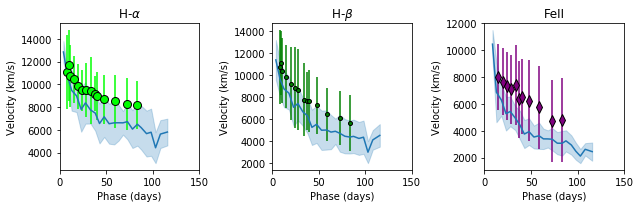

In [27]:
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=[9, 3])
dates_halpha = Time(tbdata_halpha['date'])
#ax1.plot((dates_halpha-sn15oz.jdexpl).value, np.abs(v_halpha.value/v50_phot), 
#                 color=colors['HA-cachito'], linestyle='none', marker=markers['HA-cachito'], label=r'H-$\alpha$',
#                 markeredgecolor='k', markersize = 8)

ax1.errorbar((dates_halpha-sn15oz.jdexpl).value, np.abs(v_halpha.value), 
              yerr = ((v_halpha_err_l).value, (v_halpha_err_r).value),
                 color=colors['HA-cachito'], linestyle='none', marker=markers['HA-cachito'], label=r'H-$\alpha$',
                 markeredgecolor='k', markersize = 8)


l2 = ax1.plot(t_gutierrez, vhalpha_gutierrez)
ax1.fill_between(t_gutierrez, 
                 (vhalpha_gutierrez+vhalpha_err_gutierrez),
                 (vhalpha_gutierrez-vhalpha_err_gutierrez), 
                 alpha=0.25, color=l2[0].get_color() )


ax1.set_xlim(0, 150)
ax1.set_title(r'H-$\alpha$')
ax1.set_xlabel('Phase (days)')
ax1.set_ylabel('Velocity (km/s)')
#ax1.set_ylim(0, 2.5)

dates_hbeta = Time(tbdata_HB['date'])
ax2.errorbar((dates_hbeta-sn15oz.jdexpl).value, np.abs(v_hbeta.value),
                 yerr = ((v_hbeta_err_l).value, (v_hbeta_err_r).value),
                 color=colors['HB'], linestyle='none', marker=markers['HB'], label=r'H-$\beta$',
                 markeredgecolor='k', markersize = 8)




ax2.plot(t_gutierrez,  vhbeta_gutierrez)
ax2.fill_between(t_gutierrez, 
                 (vhbeta_gutierrez+vhbeta_err_gutierrez),
                 (vhbeta_gutierrez-vhbeta_err_gutierrez), 
                 alpha=0.25, color=l2[0].get_color() )

ax2.set_xlim(0, 150)
ax2.set_title(r'H-$\beta$')
ax2.set_xlabel('Phase (days)')
ax2.set_ylabel('Velocity (km/s)')

dates_feII = Time(tbdata_feII['date'])
ax3.errorbar((dates_feII-sn15oz.jdexpl).value, np.abs(v_feII.value), 
                 yerr = ((v_feII_err_l).value, (v_feII_err_r).value),
                 color=colors['FeII_multi'], linestyle='none', marker=markers['FeII_multi'], label=r'FeII 5159',
                 markeredgecolor='k', markersize = 8)
ax3.set_title('FeII')
ax3.plot(t_gutierrez[1:],  vfeII_gutierrez)
ax3.fill_between(t_gutierrez[1:], 
                 (vfeII_gutierrez+vfeII_err_gutierrez),
                 (vfeII_gutierrez-vfeII_err_gutierrez), 
                 alpha=0.25, color=l2[0].get_color() )

ax3.set_xlim(0, 150)
ax3.set_xlabel('Phase (days)')
ax3.set_ylabel('Velocity (km/s)')
plt.tight_layout()

In [28]:
for i, j in zip(tbdata_halpha['date'], (Time(tbdata_halpha['date']) - sn15oz.jdexpl).value): 
    print(i,j)

2015-09-04T12:22:16.314 8.01546659722
2015-09-06T10:50:42.698 9.9518830787
2015-09-07T12:38:35.277 11.0267971875
2015-09-11T10:53:36.349 14.9538929282
2015-09-16T12:09:11.274 20.0063804861
2015-09-20T13:50:34.512 24.0767883333
2015-09-24T12:38:47.580 28.0269395833
2015-09-30T12:28:58.217 34.0201182523
2015-10-04T00:32:31.748 37.5225896759
2015-10-06T10:19:06.800 39.9299398148
2015-10-14T11:29:18.305 47.9786840856
2015-10-25T10:22:21.833 58.9321971412
2015-11-08T00:41:44.609 72.5289885301
2015-11-19T00:40:45.880 83.5283087963


## Look at how different Ca lines compare

Text(0,0.5,'Velocity (km/s)')

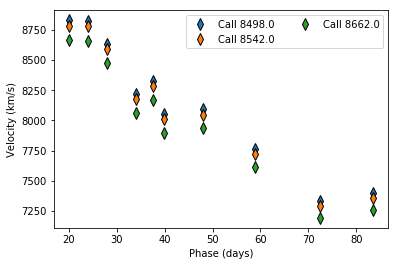

In [29]:
plt.ion()
tbdata_CaII = asc.read(os.path.join(DATA_DIR, 'CaII.tab'))
feature_tbdata = tbdata_CaII


if len(feature_tbdata) != 0:
    dates = Time(feature_tbdata['date'])
else:
    print(feature)

rest_wave = [8498.,8542.,8662.]
v_colname = ['vel0', 'vel1', 'vel2']
for rest_wl, v_col in zip(rest_wave, v_colname):
    label = 'CaII {}'.format(rest_wl)
    v = (((feature_tbdata[v_col] - rest_wl)/rest_wl)*c.c.to(u.km/u.s))

    plt.plot((dates-sn15oz.jdexpl).value, np.abs(v.value), 
              linestyle='none', marker=markers[feature], label=label,
             markeredgecolor='k', markersize = 8)
    
    

plt.legend(loc='best', ncol=2)
plt.xlabel('Phase (days)')
plt.ylabel('Velocity (km/s)')

Is a fixed offset really correct if they are moving at the same speed, they should have slightly different $\Delta\lambda$? $v = c \frac{\Delta\lambda}{\lambda}$, 

# Compare to SNEC

In [30]:
snec_dir = '../../snec_models/Ni_mass_0.0830/Ni_mixing_5.0/M18.0/E_1.400/K_10.0/R_2400/'

In [31]:
tbdata_vel = asc.read(os.path.join(snec_dir, 'Data/vel_photo.dat'), names=['time', 'velocity'])

In [32]:
ofile_info = open(os.path.join(snec_dir, 'Data/info.dat'))

In [33]:
for iline in ofile_info:
    sline = iline.split('=')
    if "Time of breakout" in sline[0]:
        breakout_time = float(sline[1].strip().split(' ')[0])*u.second

In [34]:
sline[0]

' Ni contribution to the luminosity is 5% at    12321252.857206402      seconds\n'

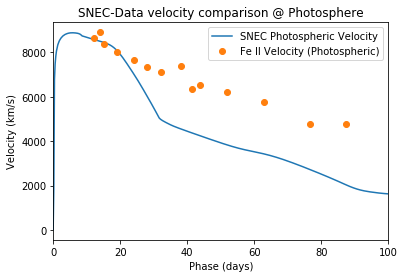

In [35]:
plt.plot((tbdata_vel['time']*u.second - breakout_time).to(u.day), (tbdata_vel['velocity']*u.cm/u.second).to(u.km/u.second), label = 'SNEC Photospheric Velocity')
plt.xlim(0, 100)
plt.plot((dates_full -sn15oz.jdexpl).value+4, v_feII_full*-1, 'o', label='Fe II Velocity (Photospheric)')
plt.xlabel('Phase (days)')
plt.ylabel('Velocity (km/s)')
plt.title('SNEC-Data velocity comparison @ Photosphere')
plt.legend(loc='best')
plt.savefig(os.path.join(FIG_DIR, 'snec_velocity_comp.pdf'))

# Compare H-alpha to H-beta

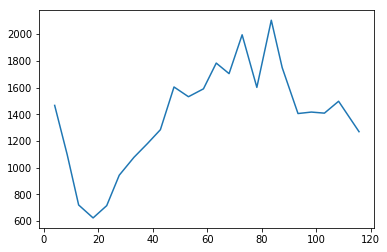

In [37]:
l2 = plt.plot(t_gutierrez, vhalpha_gutierrez-vhbeta_gutierrez)
